<h1 style="max-width: 1000px; margin: 20px auto 20px auto; text-align: center; font-size: 2rem; font-weight: bold; line-height: 1;">
    SmartStrategy Quantitative Trading
</h1>

## Data Analysis

In [3]:
# Standard Libraries
import random
import time
import copy

# Data Manipulation & Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib.lines import Line2D

# PyTorch for Model Implementation
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Sklearn Utilities for Clustering and Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Set the device to CUDA if available, otherwise fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cuda


In [4]:
# Obtain the Data from Yahoo Finance
d_start = '2019-01-01'
d_end = '2024-12-31'

#apple = yf.download('AAPL', start=d_start, end=d_end, interval='1d', progress=False, auto_adjust=True)
apple = pd.read_csv('apple.csv', parse_dates=['Date']) # If Yahoo Finance doesn't work
if isinstance(apple.columns, pd.MultiIndex):
    apple.columns = apple.columns.droplevel(1)
apple = apple.reset_index()
apple = apple[['Date', 'Close']] # Keep only Date and Close

#tesla = yf.download('TSLA', start=d_start, end=d_end, interval='1d', progress=False, auto_adjust=True)
tesla = pd.read_csv('tesla.csv', parse_dates=['Date']) # If Yahoo Finance doesn't work
if isinstance(tesla.columns, pd.MultiIndex):
    tesla.columns = tesla.columns.droplevel(1)
tesla = tesla.reset_index()
tesla = tesla[['Date', 'Close']] # Keep only Date and Close

#amazon = yf.download('AMZN', start=d_start, end=d_end, interval='1d', progress=False, auto_adjust=True)
amazon = pd.read_csv('amazon.csv', parse_dates=['Date']) # If Yahoo Finance doesn't work
if isinstance(amazon.columns, pd.MultiIndex):
    amazon.columns = amazon.columns.droplevel(1)
amazon = amazon.reset_index()
amazon = amazon[['Date', 'Close']] # Keep only Date and Close

#spy = yf.download('^SPX', start=d_start, end=d_end, interval='1d', progress=False, auto_adjust=True)
spy = pd.read_csv('spy.csv', parse_dates=['Date']) # If Yahoo Finance doesn't work
if isinstance(spy.columns, pd.MultiIndex):
    spy.columns = spy.columns.droplevel(1)
spy = spy.reset_index()
spy = spy[['Date', 'Close']]

In [5]:
apple

,Date,Close
0,2017-01-03,26.827246
1,2017-01-04,26.797224
2,2017-01-05,26.933493
3,2017-01-06,27.233757
4,2017-01-09,27.483202
...,...,...
2006,2024-12-23,254.655716
2007,2024-12-24,257.578674
2008,2024-12-26,258.396667
2009,2024-12-27,254.974930


In [6]:
tesla

,Date,Close
0,2017-01-03,14.466000
1,2017-01-04,15.132667
2,2017-01-05,15.116667
3,2017-01-06,15.267333
4,2017-01-09,15.418667
...,...,...
2006,2024-12-23,430.600006
2007,2024-12-24,462.279999
2008,2024-12-26,454.130005
2009,2024-12-27,431.660004


In [7]:
amazon

,Date,Close
0,2017-01-03,37.683498
1,2017-01-04,37.859001
2,2017-01-05,39.022499
3,2017-01-06,39.799500
4,2017-01-09,39.846001
...,...,...
2006,2024-12-23,225.059998
2007,2024-12-24,229.050003
2008,2024-12-26,227.050003
2009,2024-12-27,223.750000


In [8]:
spy

,Date,Close
0,2017-01-03,2257.830078
1,2017-01-04,2270.750000
2,2017-01-05,2269.000000
3,2017-01-06,2276.979980
4,2017-01-09,2268.899902
...,...,...
2006,2024-12-23,5974.069824
2007,2024-12-24,6040.040039
2008,2024-12-26,6037.589844
2009,2024-12-27,5970.839844


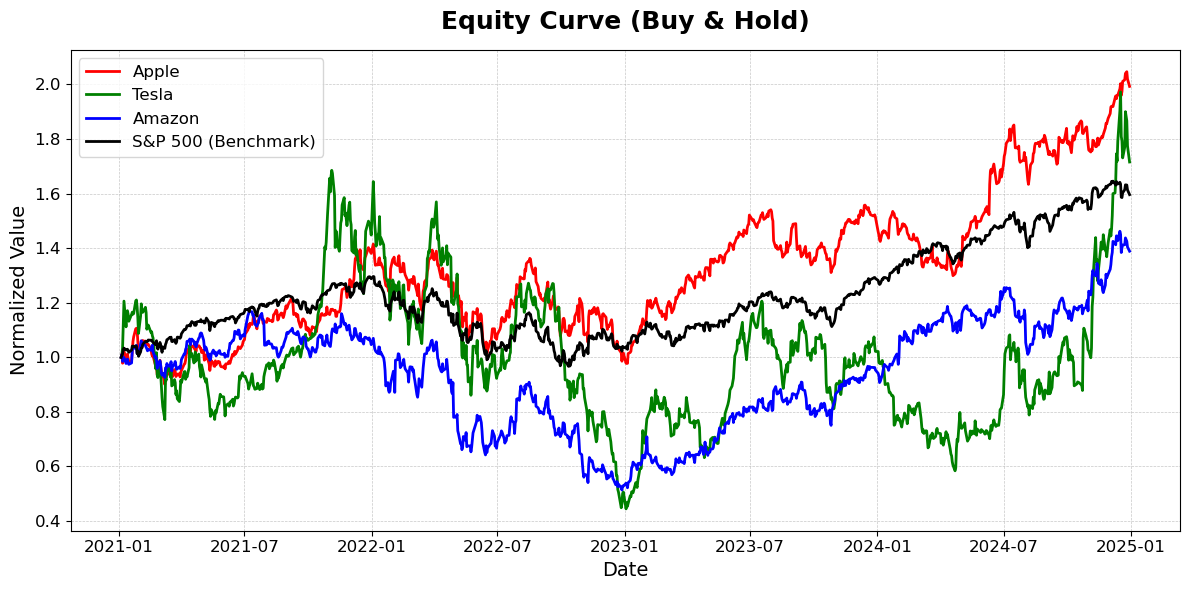

In [9]:
norm_date = pd.Timestamp('2021-01-01')

apple_norm_val = apple.loc[apple['Date'] >= norm_date, 'Close'].iloc[0]
tesla_norm_val = tesla.loc[tesla['Date'] >= norm_date, 'Close'].iloc[0]
amazon_norm_val = amazon.loc[amazon['Date'] >= norm_date, 'Close'].iloc[0]
spy_norm_val = spy.loc[spy['Date'] >= norm_date, 'Close'].iloc[0]

apple_disp = apple[apple['Date'] >= norm_date].copy()
tesla_disp = tesla[tesla['Date'] >= norm_date].copy()
amazon_disp = amazon[amazon['Date'] >= norm_date].copy()
spy_disp = spy[spy['Date'] >= norm_date].copy()

apple_disp['Norm'] = apple_disp['Close'] / apple_norm_val
tesla_disp['Norm'] = tesla_disp['Close'] / tesla_norm_val
amazon_disp['Norm'] = amazon_disp['Close'] / amazon_norm_val
spy_disp['Norm'] = spy_disp['Close'] / spy_norm_val

plt.figure(figsize=(12, 6))
plt.plot(apple_disp['Date'], apple_disp['Norm'], lw=2, label='Apple', color='red')
plt.plot(tesla_disp['Date'], tesla_disp['Norm'], lw=2, label='Tesla', color='green')
plt.plot(amazon_disp['Date'], amazon_disp['Norm'], lw=2, label='Amazon', color='blue')
plt.plot(spy_disp['Date'], spy_disp['Norm'], lw=2, label='S&P 500 (Benchmark)', color='black')

plt.title('Equity Curve (Buy & Hold)', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Normalized Value', fontsize=14)
plt.grid(which='major', linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Model

### Apple

In [12]:
test_size_apple = apple[apple['Date'].dt.year >= 2021].shape[0]
scaler = MinMaxScaler()
window_size = 60

In [13]:
train_data_apple = apple[['Close']][:-test_size_apple]
test_data_apple = apple[['Close']][-test_size_apple-window_size:]

# Scale the Close price
train_data_apple['Close'] = scaler.fit_transform(train_data_apple['Close'].values.reshape(-1,1))
test_data_apple['Close'] = scaler.transform(test_data_apple['Close'].values.reshape(-1,1))

# Prepare data with price and regime
train_data_apple = np.concatenate([train_data_apple['Close'].values.reshape(-1, 1)], axis=1)
test_data_apple = np.concatenate([test_data_apple['Close'].values.reshape(-1, 1)], axis=1)

# Training Set
X_train_apple, y_train_apple = [], []
for i in range(window_size, len(train_data_apple)):
    X_train_apple.append(train_data_apple[i-window_size:i])
    y_train_apple.append(train_data_apple[i, 0]) # Next day

# Testing Set
X_test_apple, y_test_apple = [], []
for i in range(window_size, len(test_data_apple)):
    X_test_apple.append(test_data_apple[i-window_size:i])
    y_test_apple.append(test_data_apple[i, 0]) # Next day

X_train_apple = np.array(X_train_apple)
X_test_apple = np.array(X_test_apple)
y_train_apple = np.array(y_train_apple)
y_test_apple = np.array(y_test_apple)

X_train_apple = np.reshape(X_train_apple, (X_train_apple.shape[0], X_train_apple.shape[1], len(train_data_apple[0])))
X_test_apple = np.reshape(X_test_apple, (X_test_apple.shape[0], X_test_apple.shape[1], len(train_data_apple[0])))

In [14]:
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(1, 1280, 3, batch_first=True, dropout=0.5)
        self.silu = nn.SiLU() # Swish Activation
        self.dropout = nn.Dropout(0.5) # Dropout
        self.fc1 = nn.Linear(1280, 640)
        self.fc2 = nn.Linear(640, 320)
        self.fc3 = nn.Linear(320, 160)
        self.fc4 = nn.Linear(160, 80)
        self.fc5 = nn.Linear(80, 1)

    def forward(self, x):
        x, _ = self.lstm(x) # LSTM layers
        x = x[:, -1, :] # Normalize Output
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        x = self.silu(x) # Activation
        return x

In [15]:
torch.manual_seed(120)

model = LSTMModel().to(device)
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.15)

num_epochs = 60
batch_size = 10
train_losses_apple, val_losses_apple = [], []
epoch_times = []

patience = 10
best_val_loss_apple = float('inf')
patience_counter = 0
best_model_wts = copy.deepcopy(model.state_dict())

X_train_tensor_apple = torch.tensor(X_train_apple, dtype=torch.float32)
y_train_tensor_apple = torch.tensor(y_train_apple, dtype=torch.float32).view(-1, 1)
X_test_tensor_apple = torch.tensor(X_test_apple, dtype=torch.float32)
y_test_tensor_apple = torch.tensor(y_test_apple, dtype=torch.float32).view(-1, 1)
train_dataset_apple = TensorDataset(X_train_tensor_apple, y_train_tensor_apple)
test_dataset_apple = TensorDataset(X_test_tensor_apple, y_test_tensor_apple)

train_loader_apple = DataLoader(train_dataset_apple, batch_size=batch_size, shuffle=True)
test_loader_apple = DataLoader(test_dataset_apple, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    train_loss_apple = 0

    for X_batch_apple, y_batch_apple in train_loader_apple:
        X_batch_apple, y_batch_apple = X_batch_apple.to(device), y_batch_apple.to(device)
        optimizer.zero_grad()
        predictions = model(X_batch_apple)
        loss = criterion(predictions, y_batch_apple)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        train_loss_apple += loss.item() * X_batch_apple.size(0)

    train_loss_apple /= len(train_loader_apple.dataset)
    train_losses_apple.append(train_loss_apple)

    # Validation
    model.eval()
    val_loss_apple = 0
    with torch.no_grad():
        for X_batch_apple, y_batch_apple in test_loader_apple:
            X_batch_apple, y_batch_apple = X_batch_apple.to(device), y_batch_apple.to(device)
            predictions = model(X_batch_apple)
            loss_apple = criterion(predictions, y_batch_apple)
            val_loss_apple += loss_apple.item() * X_batch_apple.size(0)

    val_loss_apple /= len(test_loader_apple.dataset)
    val_losses_apple.append(val_loss_apple)
    scheduler.step(val_loss_apple)
    epoch_times.append(time.time() - start_time)

    print(f"Epoch {epoch + 1}, Train Loss: {train_loss_apple:.4f}, Val Loss: {val_loss_apple:.4f}, Time: {epoch_times[-1]:.2f} seconds")

    # Early stopping
    if val_loss_apple < best_val_loss_apple:
        best_val_loss_apple = val_loss_apple
        best_model_wts = copy.deepcopy(model.state_dict())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

model.load_state_dict(best_model_wts)

total_time = sum(epoch_times)
best_epoch = val_losses_apple.index(min(val_losses_apple)) + 1
print(f"\nTraining completed in {total_time:.2f} seconds")
print(f"Best model selected from epoch {best_epoch} with validation loss: {min(val_losses_apple):.4f}")

Epoch 1, Train Loss: 0.0297, Val Loss: 0.0318, Time: 1.96 seconds
Epoch 2, Train Loss: 0.0138, Val Loss: 0.0588, Time: 1.67 seconds
Epoch 3, Train Loss: 0.0089, Val Loss: 0.0760, Time: 1.67 seconds
Epoch 4, Train Loss: 0.0084, Val Loss: 0.0075, Time: 1.67 seconds
Epoch 5, Train Loss: 0.0069, Val Loss: 0.0154, Time: 1.67 seconds
Epoch 6, Train Loss: 0.0057, Val Loss: 0.0295, Time: 1.67 seconds
Epoch 7, Train Loss: 0.0067, Val Loss: 0.0085, Time: 1.67 seconds
Epoch 8, Train Loss: 0.0057, Val Loss: 0.0589, Time: 1.67 seconds
Epoch 9, Train Loss: 0.0056, Val Loss: 0.0033, Time: 1.67 seconds
Epoch 10, Train Loss: 0.0059, Val Loss: 0.0527, Time: 1.67 seconds
Epoch 11, Train Loss: 0.0056, Val Loss: 0.0174, Time: 1.67 seconds
Epoch 12, Train Loss: 0.0051, Val Loss: 0.0109, Time: 1.68 seconds
Epoch 13, Train Loss: 0.0050, Val Loss: 0.0150, Time: 1.68 seconds
Epoch 14, Train Loss: 0.0046, Val Loss: 0.0027, Time: 1.68 seconds
Epoch 15, Train Loss: 0.0046, Val Loss: 0.0078, Time: 1.68 seconds
Epoc

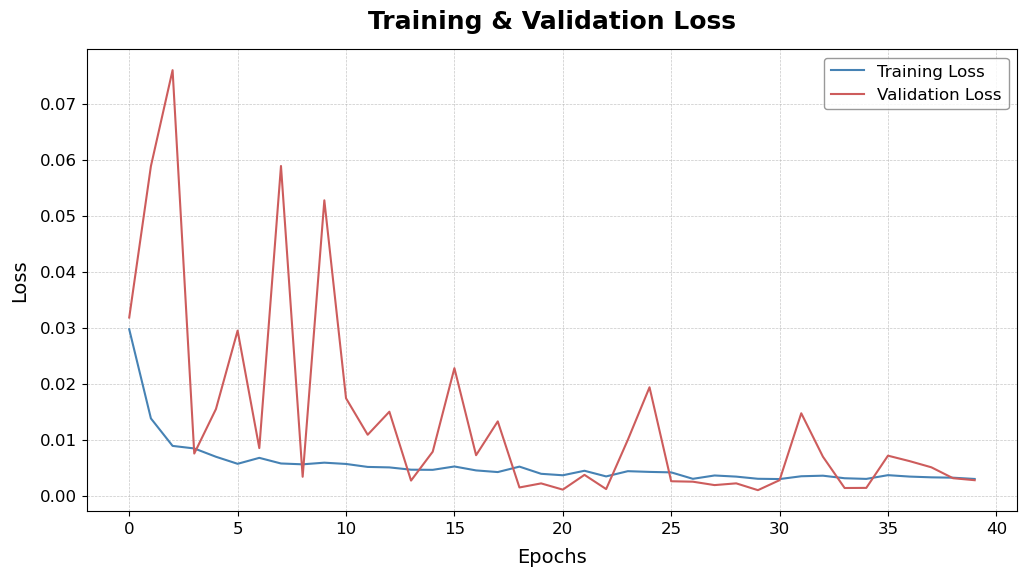

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses_apple, label='Training Loss', color='steelblue', lw=1.5)
plt.plot(val_losses_apple, label='Validation Loss', color='indianred', lw=1.5)
plt.title('Training & Validation Loss', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Epochs', fontsize=14, labelpad=8)
plt.ylabel('Loss', fontsize=14, labelpad=8)
plt.grid(which='major', linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=12, frameon=True, edgecolor='gray', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

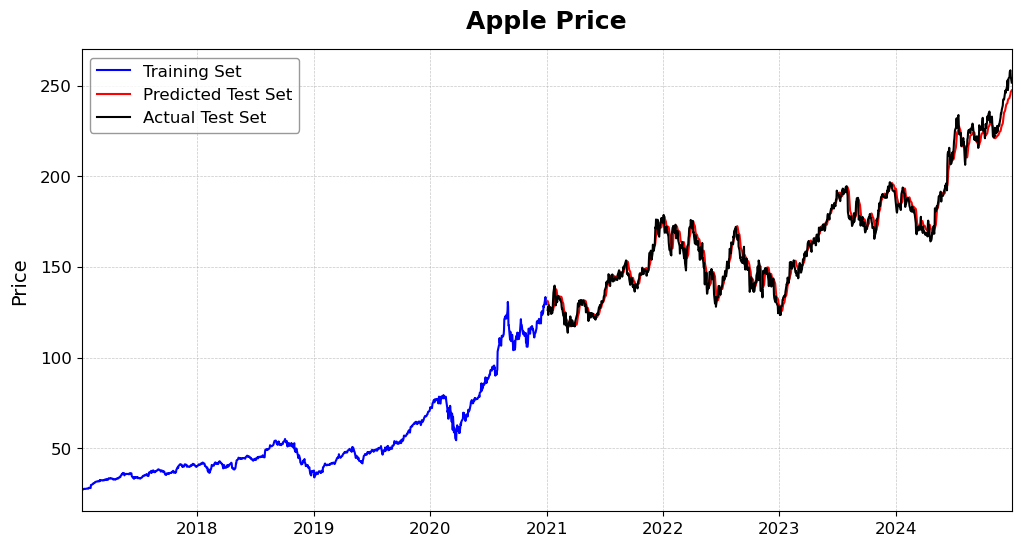

In [17]:
# Testing and Evaluation
model.eval()
with torch.no_grad():
    predictions_apple = []
    for X_batch_apple, _ in test_loader_apple:
        X_batch_apple = X_batch_apple.to(device)
        preds_apple = model(X_batch_apple)
        predictions_apple.extend(preds_apple.cpu().numpy())

y_test_true_apple = scaler.inverse_transform(y_test_apple.reshape(-1, 1))
y_test_pred_apple = scaler.inverse_transform(np.array(predictions_apple).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(apple['Date'][:-test_size_apple], apple.Close[:-test_size_apple], label="Training Set", color='blue', lw=1.5)
plt.plot(apple['Date'].iloc[-test_size_apple:], y_test_pred_apple, label="Predicted Test Set", color='red', lw=1.5)
plt.plot(apple['Date'].iloc[-test_size_apple:], y_test_true_apple, label="Actual Test Set", color='black', lw=1.5)
plt.title('Apple Price', fontsize=18, fontweight='bold', pad=15)
plt.ylabel('Price', fontsize=14, labelpad=8)
plt.xlim(min(apple['Date']), max(apple['Date']))
plt.grid(which='major', linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=12, frameon=True, edgecolor='gray', loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [18]:
def test_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(torch.tensor(X_test).float().to(device))
    y_pred = y_pred.detach().cpu().numpy().flatten()

    test_loss = mean_absolute_error(y_test, y_pred)
    accuracy = 1 - mean_absolute_percentage_error(y_test, y_pred)

    actual_diff = np.diff(y_test)
    predicted_diff = np.diff(y_pred)

    actual_dir = np.sign(actual_diff)
    predicted_dir = np.sign(predicted_diff)

    directional_matches = (actual_dir == predicted_dir)
    directional_accuracy = np.mean(directional_matches)

    return y_pred, test_loss, accuracy, directional_accuracy

y_test_pred1_apple, test_loss_apple, accuracy_apple, dir_accuracy_apple = test_model(model, X_test_apple, y_test_apple)

print(f"Test Loss (MAE): {test_loss_apple:.4f}")
print(f"Test Accuracy: {accuracy_apple:.4f}")
print(f"Directional Accuracy: {dir_accuracy_apple:.4f}")

Test Loss (MAE): 0.0341
Test Accuracy: 0.9736
Directional Accuracy: 0.4985


### Tesla

In [20]:
test_size_tesla = tesla[tesla['Date'].dt.year >= 2021].shape[0]
scaler = MinMaxScaler()
window_size = 60

In [21]:
train_data_tesla = tesla[['Close']][:-test_size_tesla]
test_data_tesla = tesla[['Close']][-test_size_tesla-window_size:]

# Scale the Close price
train_data_tesla['Close'] = scaler.fit_transform(train_data_tesla['Close'].values.reshape(-1,1))
test_data_tesla['Close'] = scaler.transform(test_data_tesla['Close'].values.reshape(-1,1))

# Prepare data with price and regime
train_data_tesla = np.concatenate([train_data_tesla['Close'].values.reshape(-1, 1)], axis=1)
test_data_tesla = np.concatenate([test_data_tesla['Close'].values.reshape(-1, 1)], axis=1)

# Training Set
X_train_tesla, y_train_tesla = [], []
for i in range(window_size, len(train_data_tesla)):
    X_train_tesla.append(train_data_tesla[i-window_size:i])
    y_train_tesla.append(train_data_tesla[i, 0]) # Next day

# Testing Set
X_test_tesla, y_test_tesla = [], []
for i in range(window_size, len(test_data_tesla)):
    X_test_tesla.append(test_data_tesla[i-window_size:i])
    y_test_tesla.append(test_data_tesla[i, 0]) # Next day

X_train_tesla = np.array(X_train_tesla)
X_test_tesla = np.array(X_test_tesla)
y_train_tesla = np.array(y_train_tesla)
y_test_tesla = np.array(y_test_tesla)

X_train_tesla = np.reshape(X_train_tesla, (X_train_tesla.shape[0], X_train_tesla.shape[1], len(train_data_tesla[0])))
X_test_tesla = np.reshape(X_test_tesla, (X_test_tesla.shape[0], X_test_tesla.shape[1], len(train_data_tesla[0])))

In [22]:
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(1, 1280, 3, batch_first=True, dropout=0.5)
        self.silu = nn.SiLU() # Swish Activation
        self.dropout = nn.Dropout(0.5) # Dropout
        self.fc1 = nn.Linear(1280, 640)
        self.fc2 = nn.Linear(640, 320)
        self.fc3 = nn.Linear(320, 160)
        self.fc4 = nn.Linear(160, 80)
        self.fc5 = nn.Linear(80, 1)

    def forward(self, x):
        x, _ = self.lstm(x) # LSTM layers
        x = x[:, -1, :] # Normalize Output
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        x = self.silu(x) # Activation
        return x

In [23]:
torch.manual_seed(120)

model = LSTMModel().to(device)
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.15)

num_epochs = 60
batch_size = 10
train_losses_tesla, val_losses_tesla = [], []
epoch_times = []

patience = 10
best_val_loss_tesla = float('inf')
patience_counter = 0
best_model_wts = copy.deepcopy(model.state_dict())

X_train_tensor_tesla = torch.tensor(X_train_tesla, dtype=torch.float32)
y_train_tensor_tesla = torch.tensor(y_train_tesla, dtype=torch.float32).view(-1, 1)
X_test_tensor_tesla = torch.tensor(X_test_tesla, dtype=torch.float32)
y_test_tensor_tesla = torch.tensor(y_test_tesla, dtype=torch.float32).view(-1, 1)
train_dataset_tesla = TensorDataset(X_train_tensor_tesla, y_train_tensor_tesla)
test_dataset_tesla = TensorDataset(X_test_tensor_tesla, y_test_tensor_tesla)

train_loader_tesla = DataLoader(train_dataset_tesla, batch_size=batch_size, shuffle=True)
test_loader_tesla = DataLoader(test_dataset_tesla, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    train_loss_tesla = 0

    for X_batch_tesla, y_batch_tesla in train_loader_tesla:
        X_batch_tesla, y_batch_tesla = X_batch_tesla.to(device), y_batch_tesla.to(device)
        optimizer.zero_grad()
        predictions = model(X_batch_tesla)
        loss = criterion(predictions, y_batch_tesla)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        train_loss_tesla += loss.item() * X_batch_tesla.size(0)

    train_loss_tesla /= len(train_loader_tesla.dataset)
    train_losses_tesla.append(train_loss_tesla)

    # Validation
    model.eval()
    val_loss_tesla = 0
    with torch.no_grad():
        for X_batch_tesla, y_batch_tesla in test_loader_tesla:
            X_batch_tesla, y_batch_tesla = X_batch_tesla.to(device), y_batch_tesla.to(device)
            predictions = model(X_batch_tesla)
            loss_tesla = criterion(predictions, y_batch_tesla)
            val_loss_tesla += loss_tesla.item() * X_batch_tesla.size(0)

    val_loss_tesla /= len(test_loader_tesla.dataset)
    val_losses_tesla.append(val_loss_tesla)
    scheduler.step(val_loss_tesla)
    epoch_times.append(time.time() - start_time)

    print(f"Epoch {epoch + 1}, Train Loss: {train_loss_tesla:.4f}, Val Loss: {val_loss_tesla:.4f}, Time: {epoch_times[-1]:.2f} seconds")

    # Early stopping
    if val_loss_tesla < best_val_loss_tesla:
        best_val_loss_tesla = val_loss_tesla
        best_model_wts = copy.deepcopy(model.state_dict())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

model.load_state_dict(best_model_wts)

total_time = sum(epoch_times)
best_epoch = val_losses_tesla.index(min(val_losses_tesla)) + 1
print(f"\nTraining completed in {total_time:.2f} seconds")
print(f"Best model selected from epoch {best_epoch} with validation loss: {min(val_losses_tesla):.4f}")

Epoch 1, Train Loss: 0.0187, Val Loss: 0.0329, Time: 1.78 seconds
Epoch 2, Train Loss: 0.0122, Val Loss: 0.2677, Time: 1.79 seconds
Epoch 3, Train Loss: 0.0088, Val Loss: 0.0145, Time: 1.82 seconds
Epoch 4, Train Loss: 0.0043, Val Loss: 0.0041, Time: 1.81 seconds
Epoch 5, Train Loss: 0.0039, Val Loss: 0.0195, Time: 1.81 seconds
Epoch 6, Train Loss: 0.0026, Val Loss: 0.0173, Time: 1.80 seconds
Epoch 7, Train Loss: 0.0034, Val Loss: 0.1175, Time: 1.80 seconds
Epoch 8, Train Loss: 0.0034, Val Loss: 0.0060, Time: 1.81 seconds
Epoch 9, Train Loss: 0.0031, Val Loss: 0.0043, Time: 1.84 seconds
Epoch 10, Train Loss: 0.0029, Val Loss: 0.0421, Time: 1.87 seconds
Epoch 11, Train Loss: 0.0029, Val Loss: 0.0037, Time: 1.85 seconds
Epoch 12, Train Loss: 0.0025, Val Loss: 0.0040, Time: 1.85 seconds
Epoch 13, Train Loss: 0.0027, Val Loss: 0.0030, Time: 1.85 seconds
Epoch 14, Train Loss: 0.0022, Val Loss: 0.0079, Time: 1.84 seconds
Epoch 15, Train Loss: 0.0028, Val Loss: 0.0039, Time: 1.84 seconds
Epoc

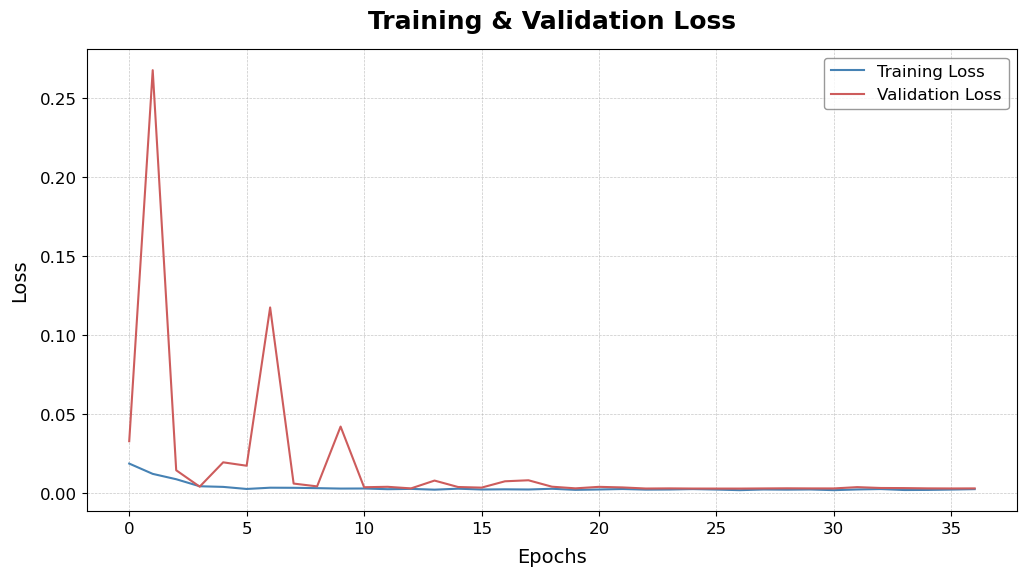

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses_tesla, label='Training Loss', color='steelblue', lw=1.5)
plt.plot(val_losses_tesla, label='Validation Loss', color='indianred', lw=1.5)
plt.title('Training & Validation Loss', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Epochs', fontsize=14, labelpad=8)
plt.ylabel('Loss', fontsize=14, labelpad=8)
plt.grid(which='major', linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=12, frameon=True, edgecolor='gray', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

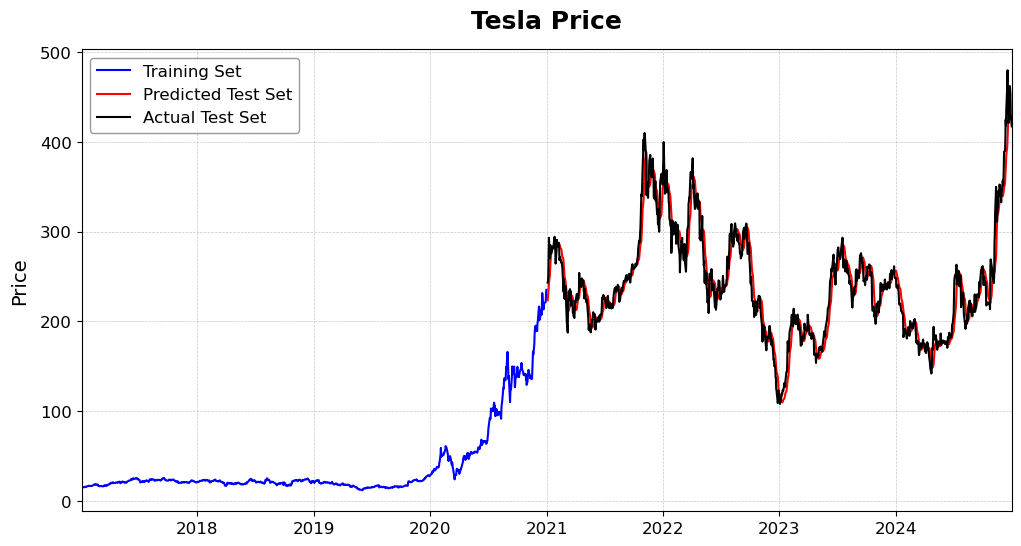

In [25]:
# Testing and Evaluation
model.eval()
with torch.no_grad():
    predictions_tesla = []
    for X_batch_tesla, _ in test_loader_tesla:
        X_batch_tesla = X_batch_tesla.to(device)
        preds_tesla = model(X_batch_tesla)
        predictions_tesla.extend(preds_tesla.cpu().numpy())

y_test_true_tesla = scaler.inverse_transform(y_test_tesla.reshape(-1, 1))
y_test_pred_tesla = scaler.inverse_transform(np.array(predictions_tesla).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tesla['Date'][:-test_size_tesla], tesla.Close[:-test_size_tesla], label="Training Set", color='blue', lw=1.5)
plt.plot(tesla['Date'].iloc[-test_size_tesla:], y_test_pred_tesla, label="Predicted Test Set", color='red', lw=1.5)
plt.plot(tesla['Date'].iloc[-test_size_tesla:], y_test_true_tesla, label="Actual Test Set", color='black', lw=1.5)
plt.title('Tesla Price', fontsize=18, fontweight='bold', pad=15)
plt.ylabel('Price', fontsize=14, labelpad=8)
plt.xlim(min(tesla['Date']), max(tesla['Date']))
plt.grid(which='major', linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=12, frameon=True, edgecolor='gray', loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [26]:
def test_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(torch.tensor(X_test).float().to(device))
    y_pred = y_pred.detach().cpu().numpy().flatten()

    test_loss = mean_absolute_error(y_test, y_pred)
    accuracy = 1 - mean_absolute_percentage_error(y_test, y_pred)

    actual_diff = np.diff(y_test)
    predicted_diff = np.diff(y_pred)

    actual_dir = np.sign(actual_diff)
    predicted_dir = np.sign(predicted_diff)

    directional_matches = (actual_dir == predicted_dir)
    directional_accuracy = np.mean(directional_matches)

    return y_pred, test_loss, accuracy, directional_accuracy

y_test_pred1_tesla, test_loss_tesla, accuracy_tesla, dir_accuracy_tesla = test_model(model, X_test_tesla, y_test_tesla)

print(f"Test Loss (MAE): {test_loss_tesla:.4f}")
print(f"Test Accuracy: {accuracy_tesla:.4f}")
print(f"Directional Accuracy: {dir_accuracy_tesla:.4f}")

Test Loss (MAE): 0.0564
Test Accuracy: 0.9450
Directional Accuracy: 0.5364


### Amazon

In [28]:
test_size_amazon = amazon[amazon['Date'].dt.year >= 2021].shape[0]
scaler = MinMaxScaler()
window_size = 60

In [29]:
train_data_amazon = amazon[['Close']][:-test_size_amazon]
test_data_amazon = amazon[['Close']][-test_size_amazon-window_size:]

# Scale the Close price
train_data_amazon['Close'] = scaler.fit_transform(train_data_amazon['Close'].values.reshape(-1,1))
test_data_amazon['Close'] = scaler.transform(test_data_amazon['Close'].values.reshape(-1,1))

# Prepare data with price and regime
train_data_amazon = np.concatenate([train_data_amazon['Close'].values.reshape(-1, 1)], axis=1)
test_data_amazon = np.concatenate([test_data_amazon['Close'].values.reshape(-1, 1)], axis=1)

# Training Set
X_train_amazon, y_train_amazon = [], []
for i in range(window_size, len(train_data_amazon)):
    X_train_amazon.append(train_data_amazon[i-window_size:i])
    y_train_amazon.append(train_data_amazon[i, 0]) # Next day

# Testing Set
X_test_amazon, y_test_amazon = [], []
for i in range(window_size, len(test_data_amazon)):
    X_test_amazon.append(test_data_amazon[i-window_size:i])
    y_test_amazon.append(test_data_amazon[i, 0]) # Next day

X_train_amazon = np.array(X_train_amazon)
X_test_amazon = np.array(X_test_amazon)
y_train_amazon = np.array(y_train_amazon)
y_test_amazon = np.array(y_test_amazon)

X_train_amazon = np.reshape(X_train_amazon, (X_train_amazon.shape[0], X_train_amazon.shape[1], len(train_data_amazon[0])))
X_test_amazon = np.reshape(X_test_amazon, (X_test_amazon.shape[0], X_test_amazon.shape[1], len(train_data_amazon[0])))

In [30]:
class LSTMModel(nn.Module):
    def __init__(self):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(1, 1280, 3, batch_first=True, dropout=0.5)
        self.silu = nn.SiLU() # Swish Activation
        self.dropout = nn.Dropout(0.5) # Dropout
        self.fc1 = nn.Linear(1280, 640)
        self.fc2 = nn.Linear(640, 320)
        self.fc3 = nn.Linear(320, 160)
        self.fc4 = nn.Linear(160, 80)
        self.fc5 = nn.Linear(80, 1)

    def forward(self, x):
        x, _ = self.lstm(x) # LSTM layers
        x = x[:, -1, :] # Normalize Output
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.dropout(x)
        x = self.fc5(x)
        x = self.silu(x) # Activation
        return x

In [31]:
torch.manual_seed(120)

model = LSTMModel().to(device)
criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, factor=0.15)

num_epochs = 60
batch_size = 10
train_losses_amazon, val_losses_amazon = [], []
epoch_times = []

patience = 10
best_val_loss_amazon = float('inf')
patience_counter = 0
best_model_wts = copy.deepcopy(model.state_dict())

X_train_tensor_amazon = torch.tensor(X_train_amazon, dtype=torch.float32)
y_train_tensor_amazon = torch.tensor(y_train_amazon, dtype=torch.float32).view(-1, 1)
X_test_tensor_amazon = torch.tensor(X_test_amazon, dtype=torch.float32)
y_test_tensor_amazon = torch.tensor(y_test_amazon, dtype=torch.float32).view(-1, 1)
train_dataset_amazon = TensorDataset(X_train_tensor_amazon, y_train_tensor_amazon)
test_dataset_amazon = TensorDataset(X_test_tensor_amazon, y_test_tensor_amazon)

train_loader_amazon = DataLoader(train_dataset_amazon, batch_size=batch_size, shuffle=True)
test_loader_amazon = DataLoader(test_dataset_amazon, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    train_loss_amazon = 0

    for X_batch_amazon, y_batch_amazon in train_loader_amazon:
        X_batch_amazon, y_batch_amazon = X_batch_amazon.to(device), y_batch_amazon.to(device)
        optimizer.zero_grad()
        predictions = model(X_batch_amazon)
        loss = criterion(predictions, y_batch_amazon)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        train_loss_amazon += loss.item() * X_batch_amazon.size(0)

    train_loss_amazon /= len(train_loader_amazon.dataset)
    train_losses_amazon.append(train_loss_amazon)

    # Validation
    model.eval()
    val_loss_amazon = 0
    with torch.no_grad():
        for X_batch_amazon, y_batch_amazon in test_loader_amazon:
            X_batch_amazon, y_batch_amazon = X_batch_amazon.to(device), y_batch_amazon.to(device)
            predictions = model(X_batch_amazon)
            loss_amazon = criterion(predictions, y_batch_amazon)
            val_loss_amazon += loss_amazon.item() * X_batch_amazon.size(0)

    val_loss_amazon /= len(test_loader_amazon.dataset)
    val_losses_amazon.append(val_loss_amazon)
    scheduler.step(val_loss_amazon)
    epoch_times.append(time.time() - start_time)

    print(f"Epoch {epoch + 1}, Train Loss: {train_loss_amazon:.4f}, Val Loss: {val_loss_amazon:.4f}, Time: {epoch_times[-1]:.2f} seconds")

    # Early stopping
    if val_loss_amazon < best_val_loss_amazon:
        best_val_loss_amazon = val_loss_amazon
        best_model_wts = copy.deepcopy(model.state_dict())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

model.load_state_dict(best_model_wts)

total_time = sum(epoch_times)
best_epoch = val_losses_amazon.index(min(val_losses_amazon)) + 1
print(f"\nTraining completed in {total_time:.2f} seconds")
print(f"Best model selected from epoch {best_epoch} with validation loss: {min(val_losses_amazon):.4f}")

Epoch 1, Train Loss: 0.0392, Val Loss: 0.0032, Time: 1.70 seconds
Epoch 2, Train Loss: 0.0172, Val Loss: 0.0031, Time: 1.70 seconds
Epoch 3, Train Loss: 0.0114, Val Loss: 0.0202, Time: 1.71 seconds
Epoch 4, Train Loss: 0.0111, Val Loss: 0.0015, Time: 1.72 seconds
Epoch 5, Train Loss: 0.0097, Val Loss: 0.0020, Time: 1.73 seconds
Epoch 6, Train Loss: 0.0076, Val Loss: 0.0094, Time: 1.73 seconds
Epoch 7, Train Loss: 0.0085, Val Loss: 0.0014, Time: 1.74 seconds
Epoch 8, Train Loss: 0.0074, Val Loss: 0.0193, Time: 1.74 seconds
Epoch 9, Train Loss: 0.0073, Val Loss: 0.0018, Time: 1.74 seconds
Epoch 10, Train Loss: 0.0072, Val Loss: 0.0128, Time: 1.76 seconds
Epoch 11, Train Loss: 0.0078, Val Loss: 0.0027, Time: 1.74 seconds
Epoch 12, Train Loss: 0.0071, Val Loss: 0.0015, Time: 1.74 seconds
Epoch 13, Train Loss: 0.0067, Val Loss: 0.0034, Time: 1.74 seconds
Epoch 14, Train Loss: 0.0060, Val Loss: 0.0016, Time: 1.73 seconds
Epoch 15, Train Loss: 0.0061, Val Loss: 0.0011, Time: 1.74 seconds
Epoc

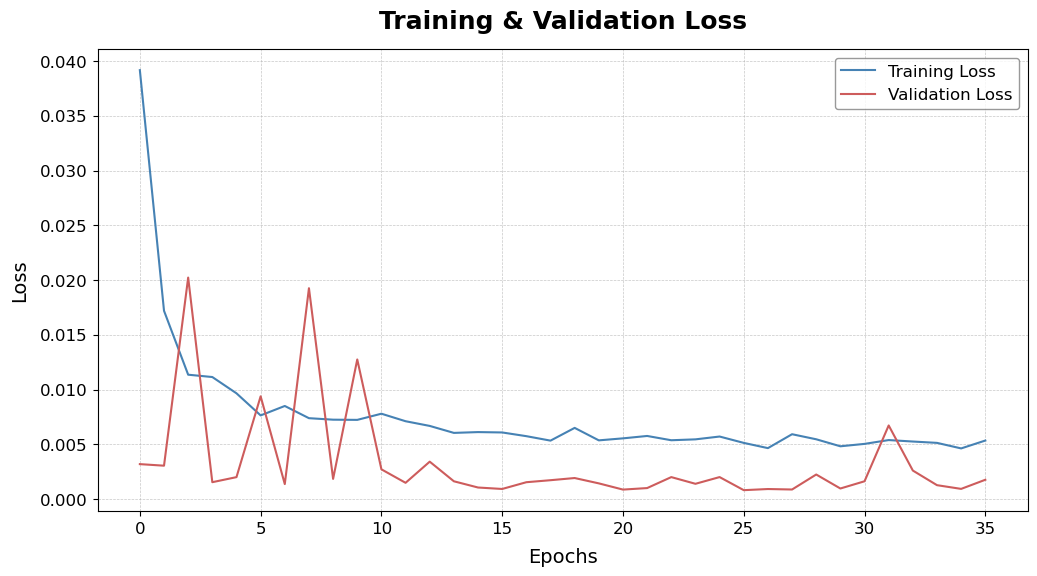

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses_amazon, label='Training Loss', color='steelblue', lw=1.5)
plt.plot(val_losses_amazon, label='Validation Loss', color='indianred', lw=1.5)
plt.title('Training & Validation Loss', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Epochs', fontsize=14, labelpad=8)
plt.ylabel('Loss', fontsize=14, labelpad=8)
plt.grid(which='major', linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=12, frameon=True, edgecolor='gray', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

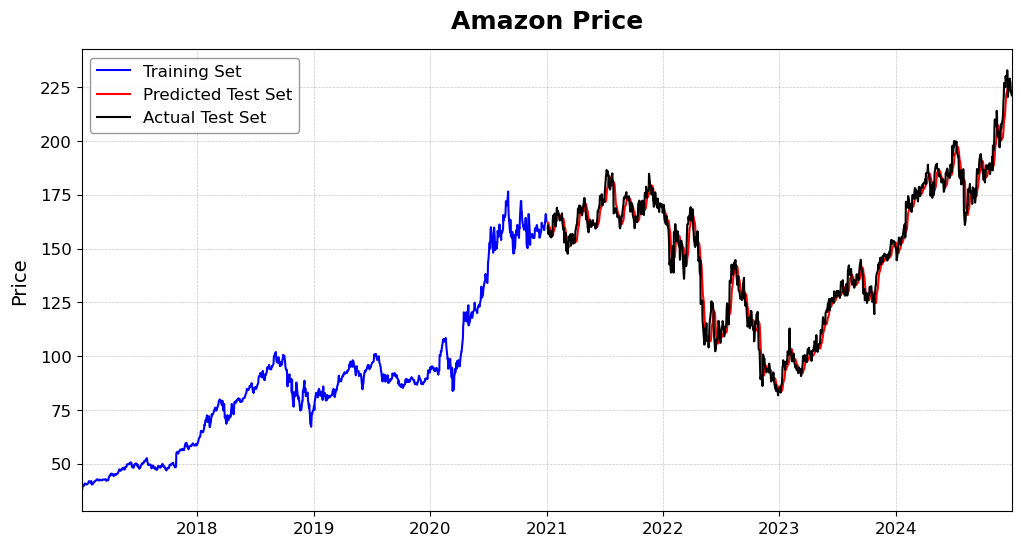

In [33]:
# Testing and Evaluation
model.eval()
with torch.no_grad():
    predictions_amazon = []
    for X_batch_amazon, _ in test_loader_amazon:
        X_batch_amazon = X_batch_amazon.to(device)
        preds_amazon = model(X_batch_amazon)
        predictions_amazon.extend(preds_amazon.cpu().numpy())

y_test_true_amazon = scaler.inverse_transform(y_test_amazon.reshape(-1, 1))
y_test_pred_amazon = scaler.inverse_transform(np.array(predictions_amazon).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(amazon['Date'][:-test_size_amazon], amazon.Close[:-test_size_amazon], label="Training Set", color='blue', lw=1.5)
plt.plot(amazon['Date'].iloc[-test_size_amazon:], y_test_pred_amazon, label="Predicted Test Set", color='red', lw=1.5)
plt.plot(amazon['Date'].iloc[-test_size_amazon:], y_test_true_amazon, label="Actual Test Set", color='black', lw=1.5)
plt.title('Amazon Price', fontsize=18, fontweight='bold', pad=15)
plt.ylabel('Price', fontsize=14, labelpad=8)
plt.xlim(min(tesla['Date']), max(tesla['Date']))
plt.grid(which='major', linestyle='--', lw=0.5, alpha=0.7)
plt.legend(fontsize=12, frameon=True, edgecolor='gray', loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [34]:
def test_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(torch.tensor(X_test).float().to(device))
    y_pred = y_pred.detach().cpu().numpy().flatten()

    test_loss = mean_absolute_error(y_test, y_pred)
    accuracy = 1 - mean_absolute_percentage_error(y_test, y_pred)

    actual_diff = np.diff(y_test)
    predicted_diff = np.diff(y_pred)

    actual_dir = np.sign(actual_diff)
    predicted_dir = np.sign(predicted_diff)

    directional_matches = (actual_dir == predicted_dir)
    directional_accuracy = np.mean(directional_matches)

    return y_pred, test_loss, accuracy, directional_accuracy

y_test_pred1_amazon, test_loss_amazon, accuracy_amazon, dir_accuracy_amazon = test_model(model, X_test_amazon, y_test_amazon)

print(f"Test Loss (MAE): {test_loss_amazon:.4f}")
print(f"Test Accuracy: {accuracy_amazon:.4f}")
print(f"Directional Accuracy: {dir_accuracy_amazon:.4f}")

Test Loss (MAE): 0.0310
Test Accuracy: 0.9580
Directional Accuracy: 0.4915


## Algorithmic Trading

In [36]:
prices = pd.DataFrame({
    'Date': apple['Date'].iloc[-test_size_apple:].values,
    'S&P 500': spy['Close'].iloc[-test_size_apple:].values,
    'Apple Actual': y_test_true_apple.flatten(),
    'Apple Predicted': y_test_pred_apple.flatten(), 
    'Tesla Actual': y_test_true_tesla.flatten(),
    'Tesla Predicted': y_test_pred_tesla.flatten(), 
    'Amazon Actual': y_test_true_amazon.flatten(),
    'Amazon Predicted': y_test_pred_amazon.flatten(), 
})

In [37]:
prices

,Date,S&P 500,Apple Actual,Apple Predicted,Tesla Actual,Tesla Predicted,Amazon Actual,Amazon Predicted
0,2021-01-04,3700.649902,126.239693,131.055878,243.256668,223.637024,159.331497,161.979462
1,2021-01-05,3726.860107,127.800453,130.717728,245.036667,227.232483,160.925507,162.159760
2,2021-01-06,3748.139893,123.498535,130.045639,251.993332,231.452988,156.919006,161.998810
3,2021-01-07,3803.790039,127.712685,128.866959,272.013336,236.194183,158.108002,161.367798
4,2021-01-08,3824.679932,128.815002,127.936256,293.339996,242.496185,159.134995,160.525940
...,...,...,...,...,...,...,...,...
999,2024-12-23,5974.069824,254.655716,243.097458,430.600006,428.121460,225.059998,223.940414
1000,2024-12-24,6040.040039,257.578674,243.895142,462.279999,426.062714,229.050003,223.172974
1001,2024-12-26,6037.589844,258.396667,245.072296,454.130005,425.735718,227.050003,222.922028
1002,2024-12-27,5970.839844,254.974930,246.407135,431.660004,426.823242,223.750000,222.986771


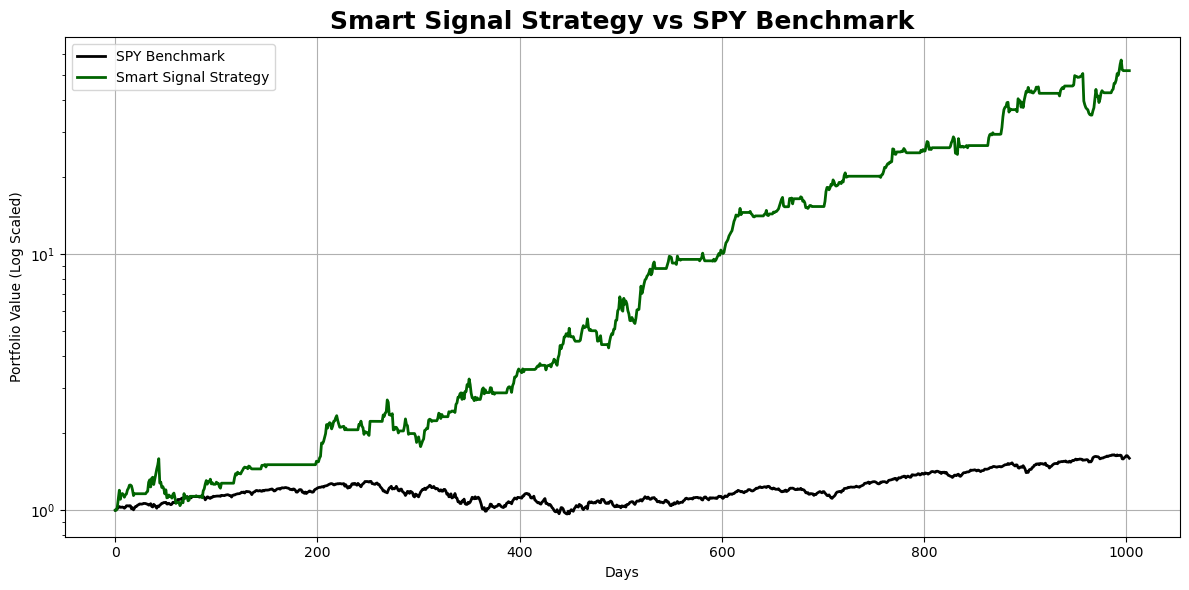

In [38]:
prices['v_buyhold'] = 1 # Always in market

for stock in ['Apple', 'Tesla', 'Amazon']:
    prices[f'{stock} Delta'] = prices[f'{stock} Predicted'] - prices[f'{stock} Actual']
    prices[f'{stock} PctChange'] = prices[f'{stock} Delta'] / prices[f'{stock} Actual']
    prices[f'{stock} Return'] = prices[f'{stock} Actual'].pct_change().fillna(0)

apple_pred_change = prices['Apple Predicted'].shift(-1) - prices['Apple Predicted']
tesla_pred_change = prices['Tesla Predicted'].shift(-1) - prices['Tesla Predicted']
amazon_pred_change = prices['Amazon Predicted'].shift(-1) - prices['Amazon Predicted']

prices['Apple Signal'] = apple_pred_change / prices['Apple Predicted']
prices['Tesla Signal'] = tesla_pred_change / prices['Tesla Predicted']
prices['Amazon Signal'] = amazon_pred_change / prices['Amazon Predicted']

# Pick strongest predicted Percentage move
signal_cols = ['Apple Signal', 'Tesla Signal', 'Amazon Signal']
col_index = {name: i for i, name in enumerate(signal_cols)}
valid_rows = prices[signal_cols].abs().notna().any(axis=1)
idxmax_series = prices.loc[valid_rows, signal_cols].abs().idxmax(axis=1)
col_indices = idxmax_series.map(col_index).astype(int).values
row_indices = np.where(valid_rows)[0]

# Only assign Best Signal for valid rows
prices.loc[valid_rows, 'Best Signal'] = prices.loc[valid_rows, signal_cols].to_numpy()[np.arange(len(row_indices)), col_indices]
prices['Best Signal Name'] = pd.Series(index=prices.index, dtype='object')
prices.loc[valid_rows, 'Best Signal Name'] = idxmax_series
prices['Best Signal'] = prices['Best Signal'].fillna(0)

# Retrieve Corresponding Daily Return
return_map = {
    'Apple Signal': prices['Apple Return'].values,
    'Tesla Signal': prices['Tesla Return'].values,
    'Amazon Signal': prices['Amazon Return'].values
}

prices['Stock Return'] = [
    return_map[name][i] if pd.notna(name) else 0
    for i, name in enumerate(prices['Best Signal Name'])
]

# Smooth Signal
prices['Signal Smoothed'] = prices['Best Signal'].rolling(window=5, center=True).mean().fillna(0)

# Apply Threshold
threshold = 0.01
prices['v_smart'] = np.where(prices['Signal Smoothed'] > threshold, 1,
                      np.where(prices['Signal Smoothed'] < -threshold, -1, 0))

# Holding Period
holding_period = 5
final_positions = []
last_pos = 0
countdown = 0

for val in prices['v_smart'].values:
    if val != 0 and countdown == 0:
        last_pos = val
        countdown = holding_period
    elif countdown > 0:
        countdown -= 1
    else:
        last_pos = 0
    final_positions.append(last_pos)

prices['v_smart'] = final_positions
prices['Held Stock'] = np.where(prices['v_smart'] != 0, prices['Best Signal Name'], 'None')

# Compute Strategy Return
prices['Strategy Return'] = prices['Stock Return'] * prices['v_smart']
prices['Portfolio_Smart'] = (1 + prices['Strategy Return']).cumprod()
# Benchmark SPY
prices['SPY Return'] = prices['S&P 500'].pct_change().fillna(0)
prices['Portfolio_SPY'] = (1 + prices['SPY Return']).cumprod()

plt.figure(figsize=(12, 6))
plt.plot(prices['Portfolio_SPY'], label="SPY Benchmark", color='black', lw=2)
plt.plot(prices['Portfolio_Smart'], label="Smart Signal Strategy", color='darkgreen', lw=2)
plt.title('Smart Signal Strategy vs SPY Benchmark', fontsize=18, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Portfolio Value (Log Scaled)')
plt.grid(True)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
returns = pd.DataFrame({
    "Smart": prices['Portfolio_Smart'].pct_change().fillna(0),
    "SPY": prices['Portfolio_SPY'].pct_change().fillna(0)
})

def yield_gross_custom(equity_curve):
    total_return = equity_curve.iloc[-1] - 1
    annualized = (equity_curve.iloc[-1]) ** (252 / len(equity_curve)) - 1
    return round(total_return * 100, 2), round(annualized * 100, 2)

def sharpe_ratio(series, rf=0.01):
    excess = series - rf / 252
    return round((excess.mean() / excess.std()) * np.sqrt(252), 2)

# Yields
tg_smart, ay_smart = yield_gross_custom(prices['Portfolio_Smart'])
tg_spy, ay_spy = yield_gross_custom(prices['Portfolio_SPY'])

# Sharpe
sharpe_smart = sharpe_ratio(returns['Smart'])
sharpe_spy = sharpe_ratio(returns['SPY'])

# Report
summary = pd.DataFrame({
    "Method": ["Smart Strategy", "SPY (Buy & Hold)"],
    "Total Gross Yield": [f"{tg_smart} %", f"{tg_spy} %"],
    "Annual Gross Yield": [f"{ay_smart} %", f"{ay_spy} %"],
    "Sharpe Ratio": [sharpe_smart, sharpe_spy]
})
print(summary)

             Method Total Gross Yield Annual Gross Yield  Sharpe Ratio
0    Smart Strategy         5088.22 %           169.44 %          2.26
1  SPY (Buy & Hold)           59.62 %            12.45 %          0.73


In [40]:
# How many times a stock was selected
signal_usage_counts = prices['Best Signal Name'].value_counts(dropna=True)
no_signal_count = (prices['v_smart'] == 0).sum()
signal_usage_counts = signal_usage_counts.copy()
signal_usage_counts['No Signal (Hold)'] = no_signal_count
signal_usage_pct = signal_usage_counts / signal_usage_counts.sum() * 100

print("Signal Usage Counts:")
print(signal_usage_counts)
print("\nSignal Usage (%):")
print(signal_usage_pct.round(2))

Signal Usage Counts:
Best Signal Name
Tesla Signal        630
Amazon Signal       206
Apple Signal        167
No Signal (Hold)    392
Name: count, dtype: int64

Signal Usage (%):
Best Signal Name
Tesla Signal        45.16
Amazon Signal       14.77
Apple Signal        11.97
No Signal (Hold)    28.10
Name: count, dtype: float64


## Comparison

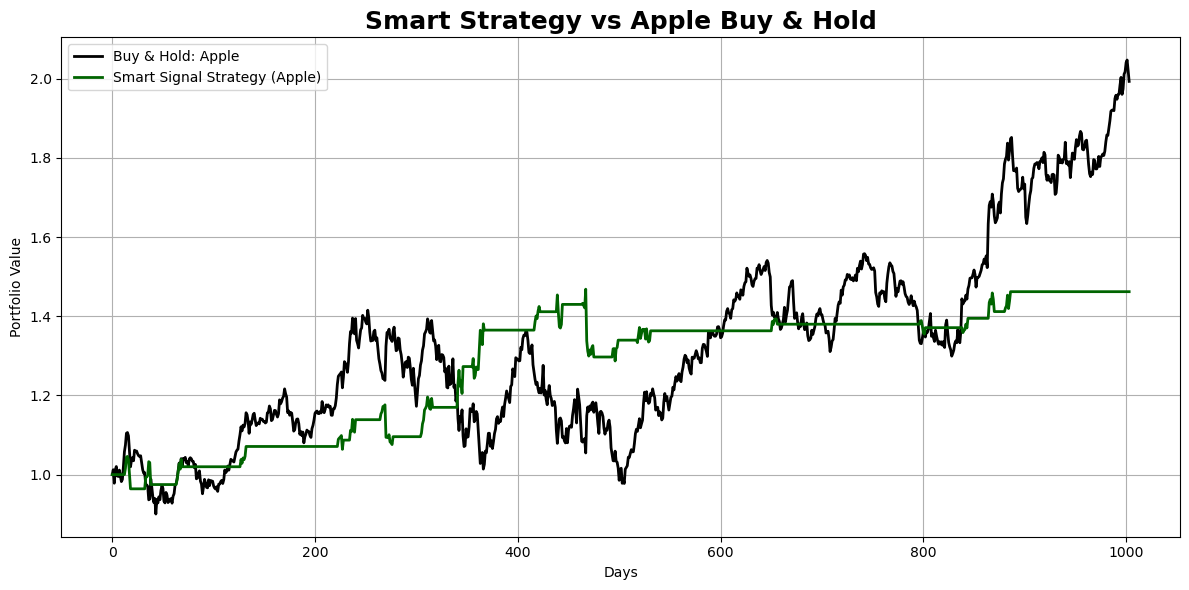

In [42]:
# Buy & Hold
prices['v_buyhold'] = 1 # Always in market

# Apple
prices['Apple Return'] = prices['Apple Actual'].pct_change().fillna(0)
prices['Portfolio_Apple_BuyHold'] = (1 + prices['Apple Return']).cumprod()
apple_pred_change = prices['Apple Predicted'].shift(-1) - prices['Apple Predicted']
prices['Apple Signal'] = apple_pred_change / prices['Apple Predicted']
prices['Signal Smoothed'] = prices['Apple Signal'].rolling(window=5, center=True).mean().fillna(0)

# Apply Threshold
threshold = 0.01
prices['v_smart'] = np.where(prices['Signal Smoothed'] > threshold, 1,
                      np.where(prices['Signal Smoothed'] < -threshold, -1, 0))

# Holding Period
holding_period = 5
final_positions = []
last_pos = 0
countdown = 0

for val in prices['v_smart'].values:
    if val != 0 and countdown == 0:
        last_pos = val
        countdown = holding_period
    elif countdown > 0:
        countdown -= 1
    else:
        last_pos = 0
    final_positions.append(last_pos)

prices['v_smart'] = final_positions

# Compute Strategy Return
prices['Strategy Return'] = prices['Apple Return'] * prices['v_smart']
prices['Portfolio_Smart'] = (1 + prices['Strategy Return']).cumprod()

# Plot Comparison
plt.figure(figsize=(12, 6))
plt.plot(prices['Portfolio_Apple_BuyHold'], label="Buy & Hold: Apple", color='black', lw=2)
plt.plot(prices['Portfolio_Smart'], label="Smart Signal Strategy (Apple)", color='darkgreen', lw=2)
plt.title('Smart Strategy vs Apple Buy & Hold', fontsize=18, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

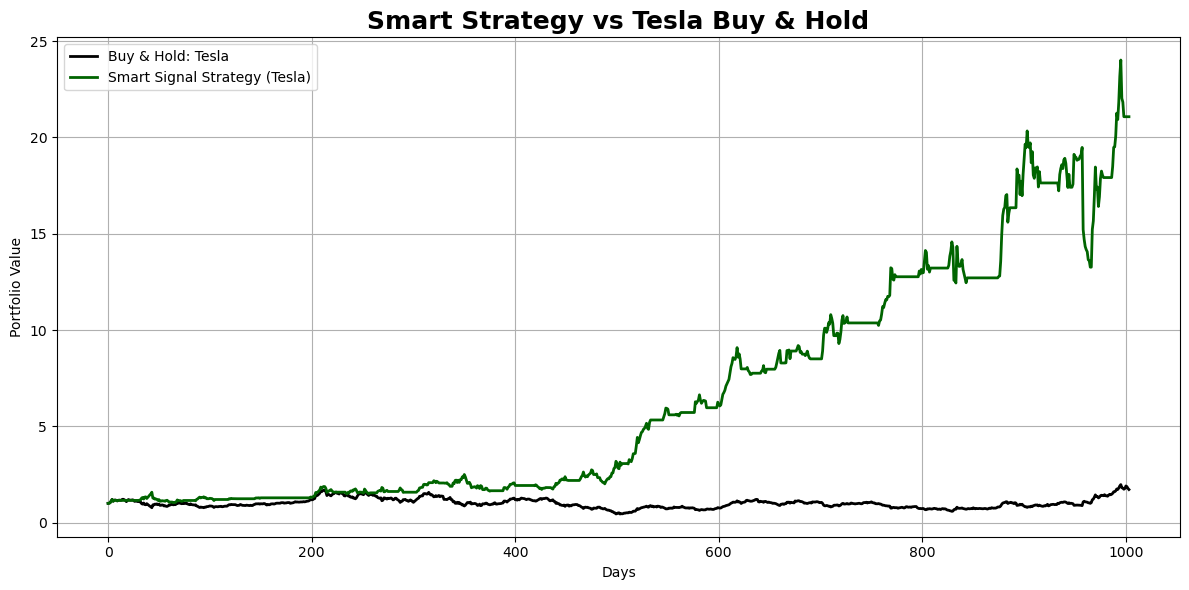

In [43]:
# Tesla
prices['Tesla Return'] = prices['Tesla Actual'].pct_change().fillna(0)
prices['Portfolio_Tesla_BuyHold'] = (1 + prices['Tesla Return']).cumprod()
tesla_pred_change = prices['Tesla Predicted'].shift(-1) - prices['Tesla Predicted']
prices['Tesla Signal'] = tesla_pred_change / prices['Tesla Predicted']
prices['Signal Smoothed'] = prices['Tesla Signal'].rolling(window=5, center=True).mean().fillna(0)

# Apply threshold
threshold = 0.01
prices['v_smart'] = np.where(prices['Signal Smoothed'] > threshold, 1,
                      np.where(prices['Signal Smoothed'] < -threshold, -1, 0))

# Holding period
holding_period = 5
final_positions = []
last_pos = 0
countdown = 0

for val in prices['v_smart'].values:
    if val != 0 and countdown == 0:
        last_pos = val
        countdown = holding_period
    elif countdown > 0:
        countdown -= 1
    else:
        last_pos = 0
    final_positions.append(last_pos)

prices['v_smart'] = final_positions

# Compute strategy return
prices['Strategy Return'] = prices['Tesla Return'] * prices['v_smart']
prices['Portfolio_Smart'] = (1 + prices['Strategy Return']).cumprod()

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(prices['Portfolio_Tesla_BuyHold'], label="Buy & Hold: Tesla", color='black', lw=2)
plt.plot(prices['Portfolio_Smart'], label="Smart Signal Strategy (Tesla)", color='darkgreen', lw=2)
plt.title('Smart Strategy vs Tesla Buy & Hold', fontsize=18, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

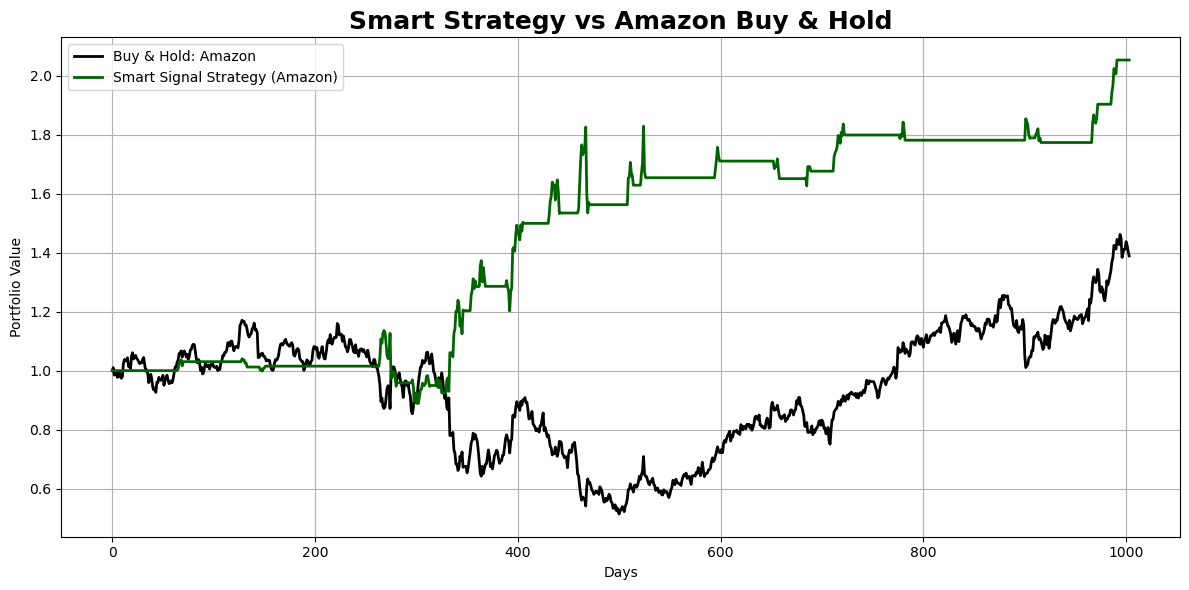

In [44]:
# Amazon
prices['Amazon Return'] = prices['Amazon Actual'].pct_change().fillna(0)
prices['Portfolio_Amazon_BuyHold'] = (1 + prices['Amazon Return']).cumprod()
amazon_pred_change = prices['Amazon Predicted'].shift(-1) - prices['Amazon Predicted']
prices['Amazon Signal'] = amazon_pred_change / prices['Amazon Predicted']
prices['Signal Smoothed'] = prices['Amazon Signal'].rolling(window=5, center=True).mean().fillna(0)

# Apply threshold
threshold = 0.01
prices['v_smart'] = np.where(prices['Signal Smoothed'] > threshold, 1,
                      np.where(prices['Signal Smoothed'] < -threshold, -1, 0))

# Holding period
holding_period = 5
final_positions = []
last_pos = 0
countdown = 0

for val in prices['v_smart'].values:
    if val != 0 and countdown == 0:
        last_pos = val
        countdown = holding_period
    elif countdown > 0:
        countdown -= 1
    else:
        last_pos = 0
    final_positions.append(last_pos)

prices['v_smart'] = final_positions

prices['Strategy Return'] = prices['Amazon Return'] * prices['v_smart']
prices['Portfolio_Smart'] = (1 + prices['Strategy Return']).cumprod()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(prices['Portfolio_Amazon_BuyHold'], label="Buy & Hold: Amazon", color='black', lw=2)
plt.plot(prices['Portfolio_Smart'], label="Smart Signal Strategy (Amazon)", color='darkgreen', lw=2)
plt.title('Smart Strategy vs Amazon Buy & Hold', fontsize=18, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

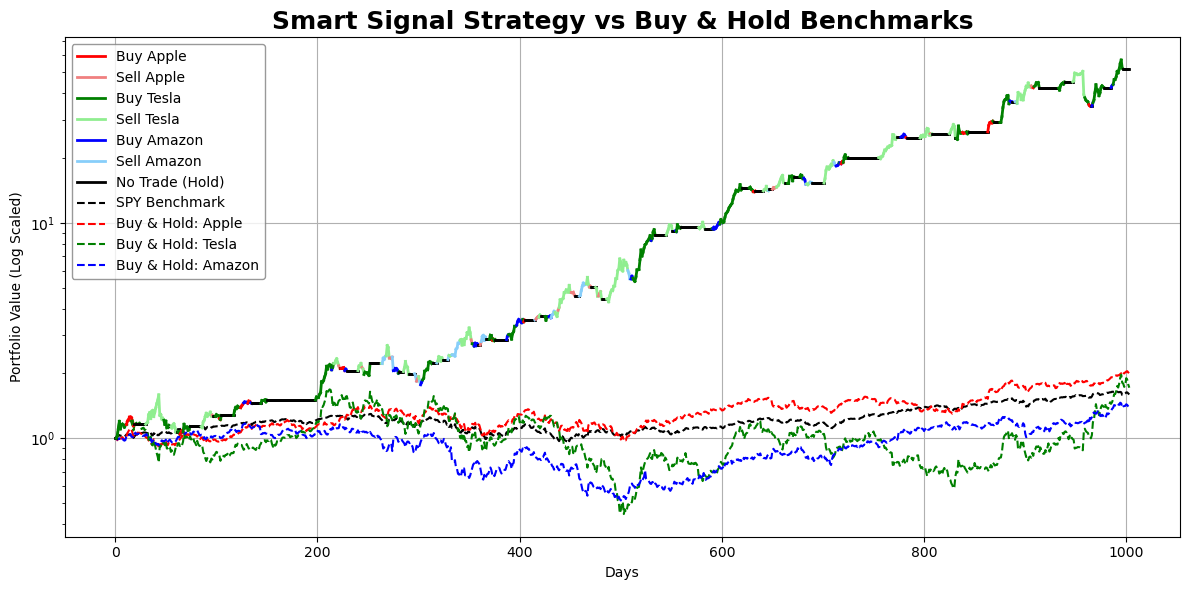

In [45]:
prices['v_buyhold'] = 1 # Always in market

for stock in ['Apple', 'Tesla', 'Amazon']:
    prices[f'{stock} Delta'] = prices[f'{stock} Predicted'] - prices[f'{stock} Actual']
    prices[f'{stock} PctChange'] = prices[f'{stock} Delta'] / prices[f'{stock} Actual']
    prices[f'{stock} Return'] = prices[f'{stock} Actual'].pct_change().fillna(0)

apple_pred_change = prices['Apple Predicted'].shift(-1) - prices['Apple Predicted']
tesla_pred_change = prices['Tesla Predicted'].shift(-1) - prices['Tesla Predicted']
amazon_pred_change = prices['Amazon Predicted'].shift(-1) - prices['Amazon Predicted']

prices['Apple Signal'] = apple_pred_change / prices['Apple Predicted']
prices['Tesla Signal'] = tesla_pred_change / prices['Tesla Predicted']
prices['Amazon Signal'] = amazon_pred_change / prices['Amazon Predicted']

# Pick strongest predicted Percentage move
signal_cols = ['Apple Signal', 'Tesla Signal', 'Amazon Signal']
col_index = {name: i for i, name in enumerate(signal_cols)}
valid_rows = prices[signal_cols].abs().notna().any(axis=1)
idxmax_series = prices.loc[valid_rows, signal_cols].abs().idxmax(axis=1)
col_indices = idxmax_series.map(col_index).astype(int).values
row_indices = np.where(valid_rows)[0]

prices.loc[valid_rows, 'Best Signal'] = prices.loc[valid_rows, signal_cols].to_numpy()[np.arange(len(row_indices)), col_indices]
prices['Best Signal Name'] = pd.Series(index=prices.index, dtype='object')
prices.loc[valid_rows, 'Best Signal Name'] = idxmax_series
prices['Best Signal'] = prices['Best Signal'].fillna(0)

return_map = {
    'Apple Signal': prices['Apple Return'].values,
    'Tesla Signal': prices['Tesla Return'].values,
    'Amazon Signal': prices['Amazon Return'].values
}

prices['Stock Return'] = [
    return_map[name][i] if pd.notna(name) else 0
    for i, name in enumerate(prices['Best Signal Name'])
]

# Smooth Signal
prices['Signal Smoothed'] = prices['Best Signal'].rolling(window=5, center=True).mean().fillna(0)

# Apply Threshold
threshold = 0.01
prices['v_smart'] = np.where(prices['Signal Smoothed'] > threshold, 1,
                      np.where(prices['Signal Smoothed'] < -threshold, -1, 0))

# Apply Holding Period Constraint
holding_period = 5
final_positions = []
last_pos = 0
countdown = 0

for val in prices['v_smart'].values:
    if val != 0 and countdown == 0:
        last_pos = val
        countdown = holding_period
    elif countdown > 0:
        countdown -= 1
    else:
        last_pos = 0
    final_positions.append(last_pos)

prices['v_smart'] = final_positions
prices['Held Stock'] = np.where(prices['v_smart'] != 0, prices['Best Signal Name'], 'None')

# Compute Strategy Return
prices['Strategy Return'] = prices['Stock Return'] * prices['v_smart']
prices['Portfolio_Smart'] = (1 + prices['Strategy Return']).cumprod()
# Benchmarks
prices['SPY Return'] = prices['S&P 500'].pct_change().fillna(0)
prices['Portfolio_SPY'] = (1 + prices['SPY Return']).cumprod()
prices['Apple_BuyHold'] = (1 + prices['Apple Return']).cumprod()
prices['Tesla_BuyHold'] = (1 + prices['Tesla Return']).cumprod()
prices['Amazon_BuyHold'] = (1 + prices['Amazon Return']).cumprod()

# Plot
color_map = {
    ('Apple Signal', 1): 'red',
    ('Apple Signal', -1): 'lightcoral',
    ('Tesla Signal', 1): 'green',
    ('Tesla Signal', -1): 'lightgreen',
    ('Amazon Signal', 1): 'blue',
    ('Amazon Signal', -1): 'lightskyblue',
    ('None', 0): 'black'
}

plt.figure(figsize=(12, 6))
plt.plot(prices['Portfolio_SPY'], label="SPY Benchmark", color='black', linestyle='--', lw=1.5)
plt.plot(prices['Apple_BuyHold'], label="Buy & Hold: Apple", color='red', linestyle='--', lw=1.5)
plt.plot(prices['Tesla_BuyHold'], label="Buy & Hold: Tesla", color='green', linestyle='--', lw=1.5)
plt.plot(prices['Amazon_BuyHold'], label="Buy & Hold: Amazon", color='blue', linestyle='--', lw=1.5)

for i in range(1, len(prices)):
    stock = prices['Held Stock'].iloc[i]
    direction = prices['v_smart'].iloc[i]
    
    color = color_map.get((stock, direction), 'black') 
    plt.plot(prices.index[i-1:i+1],
             prices['Portfolio_Smart'].iloc[i-1:i+1],
             color=color, lw=2)


plt.title('Smart Signal Strategy vs Buy & Hold Benchmarks', fontsize=18, fontweight='bold')
plt.yscale('log')
plt.xlabel('Days')
plt.ylabel('Portfolio Value (Log Scaled)')
plt.grid(True)

legend_elements = [
    Line2D([0], [0], color='red', lw=2, label='Buy Apple'),
    Line2D([0], [0], color='lightcoral', lw=2, label='Sell Apple'),
    Line2D([0], [0], color='green', lw=2, label='Buy Tesla'),
    Line2D([0], [0], color='lightgreen', lw=2, label='Sell Tesla'),
    Line2D([0], [0], color='blue', lw=2, label='Buy Amazon'),
    Line2D([0], [0], color='lightskyblue', lw=2, label='Sell Amazon'),
    Line2D([0], [0], color='black', lw=2, label='No Trade (Hold)'),
    Line2D([0], [0], color='black', linestyle='--', lw=1.5, label='SPY Benchmark'),
    Line2D([0], [0], color='red', linestyle='--', lw=1.5, label='Buy & Hold: Apple'),
    Line2D([0], [0], color='green', linestyle='--', lw=1.5, label='Buy & Hold: Tesla'),
    Line2D([0], [0], color='blue', linestyle='--', lw=1.5, label='Buy & Hold: Amazon')
]
plt.legend(handles=legend_elements, fontsize=10, frameon=True, edgecolor='gray', loc='upper left')
plt.tight_layout()
plt.show()